### ติดตั้ง library cv2

In [128]:
!pip install opencv-python

### นำเข้า module ของ libray

In [129]:
import cv2
from cv2 import CascadeClassifier
from cv2.data import haarcascades
from google.colab.patches import cv2_imshow

### อ่านไฟล์รูปภาพและปรับขนาดของรูปภาพเพราะรูปภาพต้นฉบับมีขนาดใหญ่ไป

(2048, 1362, 3)


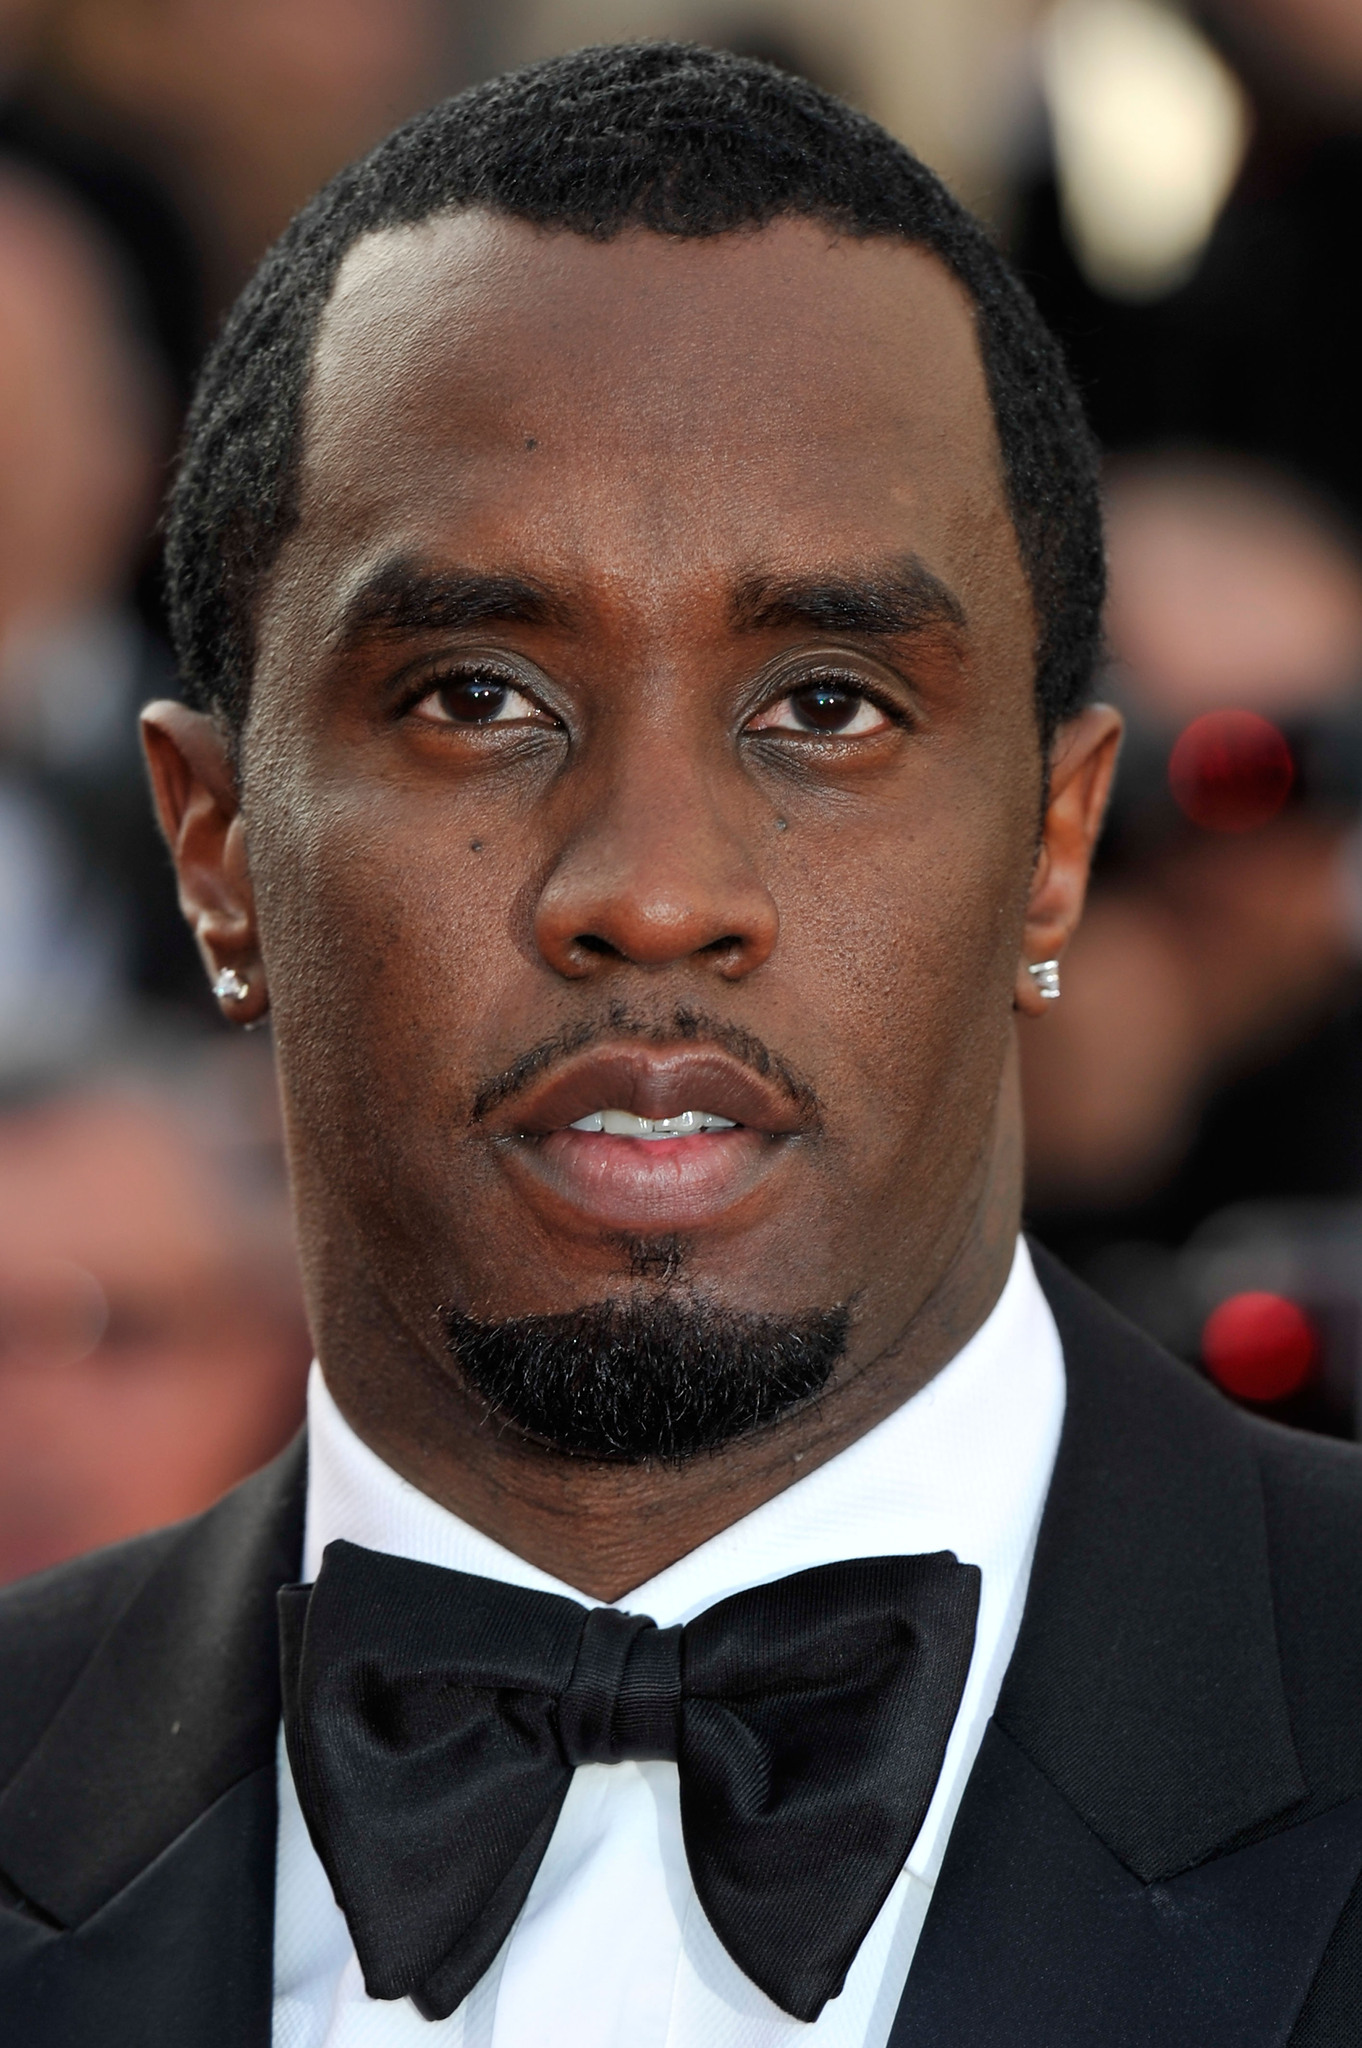

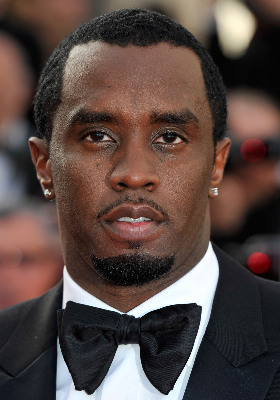

In [130]:
img = cv2.imread("diddy.jpg")

# ปริ้นแสดงผลเพื่ออ่านขนาดรูปร่างของรูปภาพ
print(img.shape)
cv2_imshow(img)

# สร้างตัวแปร tuple เพื่อส่งค่า arguement เข้าไปใน method
dsize = (280, 400)
# กำหนดขนาดของรูปภาพใหม่
resized_img = cv2.resize(img, dsize=dsize)
# แสดงผลรูปภาพ
cv2_imshow(resized_img)

### export รูปภาพใหม่ที่กำหนดขนาดของรูปภาพเรียบร้อยแล้ว

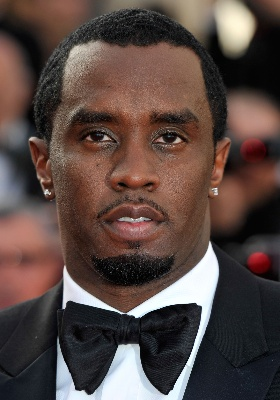

In [131]:
# เขียนรูปภาพใหม่โดยวาง path และ ตัวแปรรูปภาพที่เราปรับขนาดมา
cv2.imwrite("diddy2.jpg", resized_img)

# อ่านรูปภาพผลลัพธ์ที่เราสร้างมา
img = cv2.imread('diddy2.jpg')
# แสดงผลรูปภาพ
cv2_imshow(img)

### สร้าง object cascades เพื่อตรวจจับใบหน้า, ตา, จมูก และ ปาก ด้านใน class ให้ส่งค่า argument ของ path xml

In [132]:
face_cascade = CascadeClassifier(haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = CascadeClassifier(haarcascades + 'haarcascade_eye.xml')
# ไม่มีไฟล์ nose ใน repository ของ opencv ต้องโหลดไฟล์ xml นี้แยกอีกที
nose_cascade = CascadeClassifier('haarcascade_mcs_nose.xml')
mouth_cascade = CascadeClassifier(haarcascades + 'haarcascade_smile.xml')

### detect บริเวณรอบๆใบหน้าโดยให้ mark ที่จุดสำคัญๆคือ ใบหน้า, ตา, จมูก และ ปาก

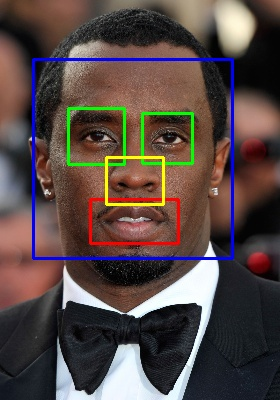

In [133]:
# ปรับสีรูปภาพให้เป็นรูปภาพ grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# ตรวจจับใบหน้า
faces = face_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# วาดรูปสี่เหลี่ยมรอบๆใบหน้า
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    # วาดรูปสี่เหลี่ยมรอบๆดวงตา
    roi_gray = img_gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

    # ตรวจจับดวงตา
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=5)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

    # ตรวจจับปาก
    mouth = mouth_cascade.detectMultiScale(roi_gray, scaleFactor=1.2, minNeighbors=15, minSize=(30, 30))
    for (mx, my, mw, mh) in mouth:
        cv2.rectangle(roi_color, (mx, my), (mx+mw, my+mh), (0, 0, 255), 2)

    # ตรวจจับจมูก
    nose = nose_cascade.detectMultiScale(roi_gray, scaleFactor=1.2, minNeighbors=8, minSize=(30, 30))
    for (nx, ny, nw, nh) in nose:
        cv2.rectangle(roi_color, (nx, ny), (nx+nw, ny+nh), (0, 255, 255), 2)

# export ไฟล์ผลลัพธ์รูปภาพที่ detect เรียบร้อยแล้ว
cv2.imwrite("result.jpg", img)
# อ่านรูปภาพที่พึ่งสร้างมา
result = cv2.imread("result.jpg")
# แสดงผลรูปภาพ
cv2_imshow(result)